In [33]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Read the databases from resources
health_factors = pd.read_csv("/content/Health_Risk_factors.csv")
agriculture = pd.read_csv("/content/agricultural_inputs.csv")


In [35]:
merged_df = pd.concat([agriculture, health_factors['Incidence of tuberculosis  per 100,000 people 2018']], axis=1)

In [36]:
merged_df.columns

Index(['Country', 'Agricultural land  % of land area 2000-02',
       'Agricultural land  % of land area 2014-16',
       'Agricultural land  % irrigated 2014-16',
       'Average annual precipitation  millimeters 2014',
       'Land under cereal production  hectares thousands 2000-02',
       'Land under cereal production  hectares thousands 2014-16',
       'Fertilizer consumption  % of fertilizer production 2014-16',
       'Fertilizer consumption  kilograms per hectare of arable land 2014-16',
       'Agricultural employment  % of total employment 2000-02',
       'Agricultural employment  % of total employment 2014-16',
       'Agricultural machinery tractors per 100 sq. km of arable land 2000',
       'Agricultural machinery tractors per 100 sq. km of arable land 2009',
       'Incidence of tuberculosis  per 100,000 people 2018'],
      dtype='object')

In [39]:
# Renaming columns in the health_factors DataFrame to more descriptive names
ag = merged_df.rename(columns={
    "Incidence of tuberculosis  per 100,000 people 2018": "tuberculosis",
    'Fertilizer consumption  kilograms per hectare of arable land 2014-16': "fertilizer",
    "Agricultural employment  % of total employment 2000-02": "farmers_2000",
    "Agricultural employment  % of total employment 2014-16": "farmers_recent",
    "Agricultural machinery tractors per 100 sq. km of arable land 2009": "agricultur_machinery"})
ag.columns
ag.describe()

,Agricultural land % of land area 2000-02,Agricultural land % of land area 2014-16,Agricultural land % irrigated 2014-16,Average annual precipitation millimeters 2014,Land under cereal production hectares thousands 2000-02,Land under cereal production hectares thousands 2014-16,Fertilizer consumption % of fertilizer production 2014-16,fertilizer,farmers_2000,farmers_recent,Agricultural machinery tractors per 100 sq. km of arable land 2000,agricultur_machinery,tuberculosis
count,204.000000,206.000000,53.000000,95.000000,107.000000,103.000000,74.000000,157.000000,187.000000,187.000000,131.000000,102.000000,207.000000
mean,38.176471,37.694175,10.086792,480.178947,278.223364,260.492233,145.890541,141.322930,31.260963,25.916043,207.312977,194.943137,102.893720
std,22.454732,22.371338,13.173765,253.708032,293.391494,297.778604,161.583979,149.705871,25.199064,23.425185,251.325539,230.880890,137.634271
min,0.000000,1.000000,0.000000,51.000000,0.000000,0.000000,0.000000,0.300000,0.300000,0.100000,0.100000,0.100000,0.000000
25%,19.000000,20.000000,1.100000,241.000000,11.350000,3.650000,23.675000,22.900000,7.450000,5.000000,25.650000,34.075000,9.500000
50%,39.000000,39.000000,4.800000,536.000000,173.500000,148.100000,100.900000,112.100000,24.200000,18.600000,111.700000,112.050000,45.000000
75%,55.250000,55.000000,13.800000,659.000000,476.100000,415.700000,200.600000,196.100000,49.350000,42.000000,286.050000,252.350000,144.000000
max,85.000000,83.000000,59.700000,934.000000,960.100000,999.800000,664.500000,750.700000,92.200000,91.800000,973.000000,990.000000,611.000000


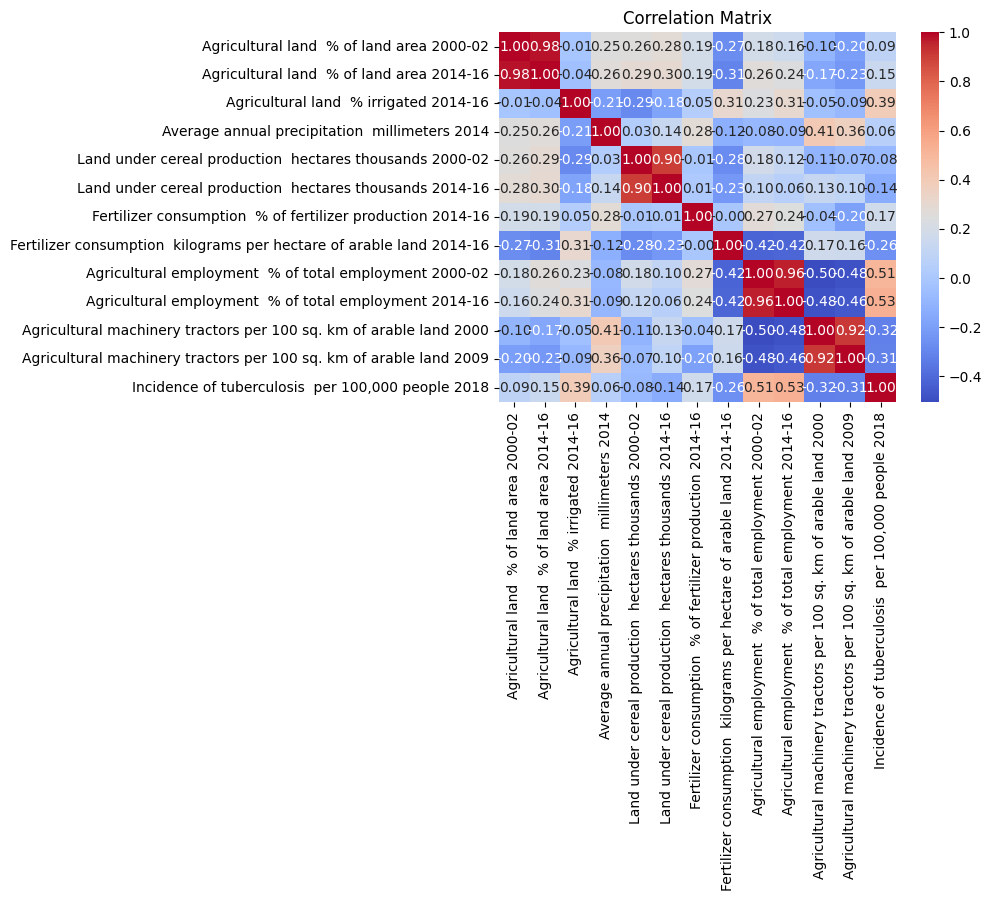

In [28]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [41]:
df=ag[["fertilizer","farmers_2000","farmers_recent", "agricultur_machinery" , 'tuberculosis']]
#df1 = ag.replace('', np.nan)  # Replace empty values with NaN
df1 = df.dropna()  # Drop rows with any missing values

In [42]:
df1["tuberculosis"].describe()

count     89.000000
mean      82.685393
std      115.813584
min        0.000000
25%       10.000000
50%       38.000000
75%      108.000000
max      554.000000
Name: tuberculosis, dtype: float64

In [43]:
# Define the thresholds for classification

threshold_tuberculosis = 100
# Create a DataFrame to store the classified values
df2 = pd.DataFrame()
# Classify every columns
df2=df1[["fertilizer","farmers_2000","farmers_recent", "agricultur_machinery" ]]
df2['tuberculosis'] = [0 if i < threshold_tuberculosis else 1 for i in df1['tuberculosis']]

# Extract X and y
y = df2['tuberculosis'].values
X = df2.drop(columns='tuberculosis').values
df2.shape

(89, 5)

In [44]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,stratify=y,test_size=.2)

In [45]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
l_1 = 50
l_2 = 50
input_features = len(X_train[0])
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=l_1, input_dim = input_features, activation = "tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=l_2, activation = "LeakyReLU"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
# Train the model
nn.fit(X_train, y_train, epochs=50)

Epoch 1/50
3/3 [==============================] - 3s 22ms/step - loss: 0.9250 - accuracy: 0.2676
Epoch 2/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6633 - accuracy: 0.5915
Epoch 3/50
3/3 [==============================] - 0s 10ms/step - loss: 0.5105 - accuracy: 0.7324
Epoch 4/50
3/3 [==============================] - 0s 11ms/step - loss: 0.4537 - accuracy: 0.7606
Epoch 5/50
3/3 [==============================] - 0s 11ms/step - loss: 0.4297 - accuracy: 0.8028
Epoch 6/50
3/3 [==============================] - 0s 11ms/step - loss: 0.4230 - accuracy: 0.8028
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 0.4213 - accuracy: 0.8028
Epoch 8/50
3/3 [==============================] - 0s 12ms/step - loss: 0.4154 - accuracy: 0.8169
Epoch 9/50
3/3 [==============================] - 0s 11ms/step - loss: 0.4076 - accuracy: 0.8169
Epoch 10/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3994 - accuracy: 0.8169
Epoch 11/50
3/3 [==============

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.4357 - accuracy: 0.8333 - 182ms/epoch - 182ms/step
Loss: 0.4356929361820221, Accuracy: 0.8333333134651184


In [49]:
# Predict on the test data
y_pred = nn.predict(X_test)

# The predictions will be in the form of probabilities, so you might want to round them to get class labels (0 or 1)
y_pred_class = y_pred.round()
# Calculate the accuracy of the predictions
correct_predictions = (y_pred_class == y_test.reshape(-1, 1)).sum()
total_samples = len(y_test)
accuracy = correct_predictions / total_samples
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

1/1 [==============================] - 0s 89ms/step
Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.75      0.60      0.67         5

    accuracy                           0.83        18
   macro avg       0.80      0.76      0.78        18
weighted avg       0.83      0.83      0.83        18

